# Dependencies

1. numpy
2. pillow
3. openCV
4. win32com

IDE-Jupyter Notebook in Anaconda Navigator

# Step 1 - Grab the Screen

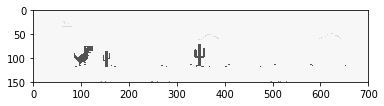

In [18]:
import numpy as np
import cv2
from PIL import ImageGrab
from matplotlib import pyplot as plt

screen=np.array(ImageGrab.grab(bbox=(600,200,1300,350)))
screen=cv2.cvtColor(screen, cv2.COLOR_BGR2RGB)
plt.imshow(screen)
plt.show()

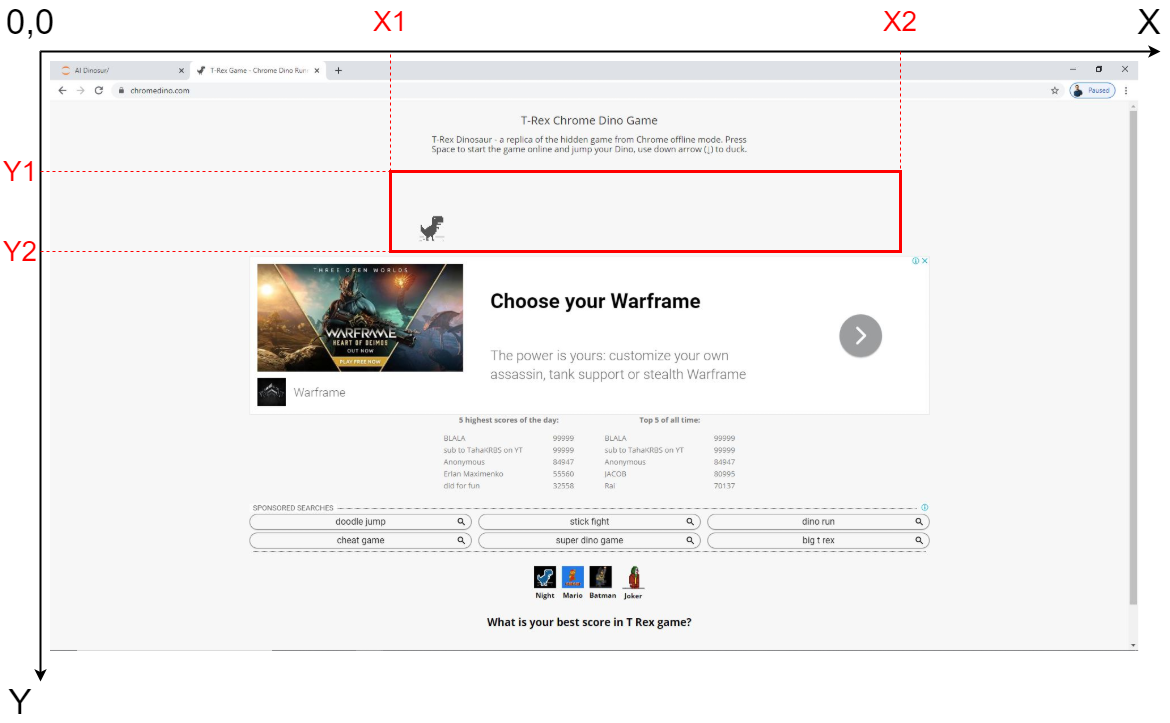

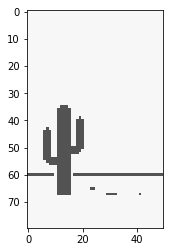

In [19]:
from matplotlib import pyplot as plt

tree_x,tree_y,tree_w,tree_h=(140,50,50,80)
tree_window=screen[tree_y:tree_y+tree_h,tree_x:tree_x+tree_w]
plt.imshow(tree_window)
plt.show()

# Step 2 - Capture a ROI to detect the Tree
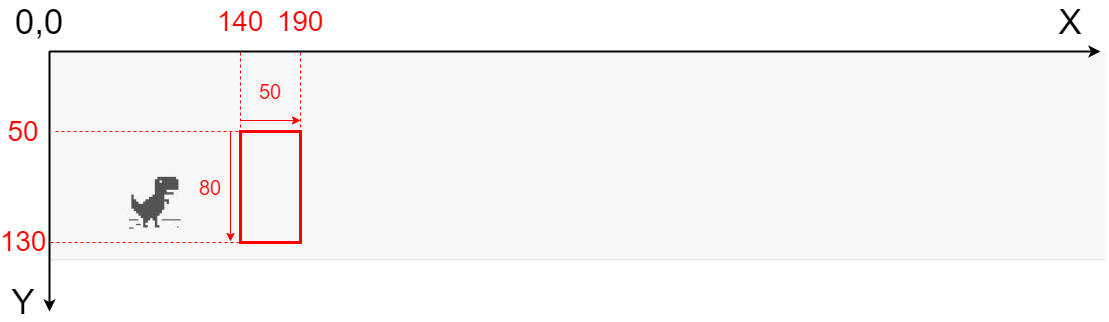

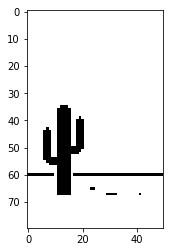

In [20]:
ret,tree_window_thresh=cv2.threshold(tree_window,127,255,cv2.THRESH_BINARY)
plt.imshow(tree_window_thresh)
plt.show()

In [19]:
tree_no_black = np.count_nonzero(tree_window_thresh==0)
tree_no_pixels = np.size(tree_window_thresh)

tree_ratio=tree_no_black/tree_no_pixels

import win32com.client as comctl
wsh = comctl.Dispatch("WScript.Shell")

wsh.AppActivate("chromedino.com")

print(tree_ratio)

if(tree_ratio>0.05):

    cv2.rectangle(printscreen,(tree_x,tree_y,tree_w,tree_h),(0,0,255),-1)
    cv2.putText(printscreen,"UP",(tree_x,tree_y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    wsh.SendKeys("{UP}")

# Step 3 - Press UP when the ratio > 0.05
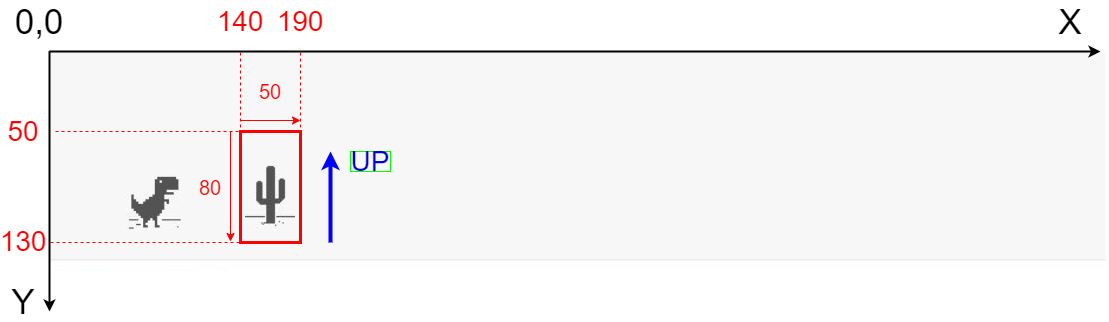

In [1]:
%%javascript
$('#menubar').toggle();

<IPython.core.display.Javascript object>